In [1]:
%pylab inline
from app.analysis import Quote
corporate = Quote.screen_funds('Bonds', 'Domestic', 'Corporate', 'Investment Grade')
municipal = Quote.screen_funds('Bonds', 'Domestic', 'Municipal')
multiassets = Quote.screen_funds('Bonds', 'Domestic', 'MultiAssets (Bond Funds)', 'Long-Term')
multiassets += ['BIV', 'AGG', 'BND', 'SCHZ']
print(len(corporate), len(municipal), len(multiassets))
quote = Quote(corporate + municipal + multiassets, 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
5 9 8
from 2019-02-19 to 2019-08-16 - 22


In [2]:
stats = quote.statistics()
assert stats[stats['len'] < stats['len'].max()].empty
stats = stats[(stats['shrp'] > 0) & (stats['mean'] > 0.04)]
print(len(stats))
stats.sort_values('mean', ascending=False)

20


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
BLV,122,0.140032,0.239619,0.556241,19.116051,2.488782
VCLT,122,0.130503,0.193566,0.639356,17.587010,2.439525
IGLB,122,0.128719,0.191758,0.636079,17.293207,2.345813
BAB,122,0.093463,0.153210,0.566002,12.630154,1.234570
LQD,122,0.088766,0.127557,0.643001,11.914570,1.584887
USIG,122,0.074113,0.101686,0.662499,9.735889,1.170707
IGIB,122,0.072269,0.087473,0.749065,9.519610,0.928679
VCIT,122,0.072104,0.092205,0.708835,9.649660,0.988887
BIV,122,0.067289,0.103965,0.582336,8.836697,0.980392


evicted BAB 0.812 0.750
evicted VCLT 0.899 0.518
evicted IGIB 0.582 0.569
retry backlogs ['AGG', 'BIV', 'SCHZ', 'PZA', 'USIG', 'MUB', 'BLV', 'BND', 'SPIB', 'LQD', 'VCIT', 'IGLB', 'ITM', 'TFI', 'CMF'] at 0.905/-0.51 - 0.937
evicted VCIT 0.616 0.594
retry backlogs ['AGG', 'SCHZ', 'BIV', 'BND', 'MUB', 'PZA', 'BLV', 'USIG', 'SPIB', 'IGLB', 'LQD', 'ITM', 'TFI', 'CMF'] at 0.910/-0.52 - 0.937
evicted SPIB 0.616 0.594
retry backlogs ['AGG', 'SCHZ', 'BND', 'MUB', 'PZA', 'BIV', 'BLV', 'USIG', 'IGLB', 'LQD', 'ITM', 'TFI', 'CMF'] at 0.915/-0.53 - 0.937
evicted LQD 0.580 0.514
retry backlogs ['AGG', 'MUB', 'SCHZ', 'BND', 'PZA', 'BLV', 'BIV', 'USIG', 'IGLB', 'ITM', 'TFI', 'CMF'] at 0.920/-0.54 - 0.937
evicted USIG 0.655 0.593
evicted TFI 0.919 0.709
retry backlogs ['AGG', 'MUB', 'PZA', 'SCHZ', 'BLV', 'BND', 'BIV', 'ITM', 'IGLB', 'CMF'] at 0.925/-0.55 - 0.937
evicted BIV 0.851 0.695
evicted IGLB 0.610 0.608
retry backlogs ['AGG', 'SCHZ', 'PZA', 'MUB', 'BLV', 'BND', 'ITM', 'CMF'] at 0.930/-0.56 - 0.93

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.053003,0.049367,-0.054672,0.019901,0.043329,0.077204,0.178435,0.936984,6.880454,0.303186
HYD,122.0,0.054808,0.052295,-0.066276,0.020823,0.047201,0.079216,0.205382,0.919043,7.116772,0.409061
VTEB,122.0,0.049788,0.049708,-0.063010,0.015184,0.041325,0.077193,0.165537,0.865894,6.460334,0.333721


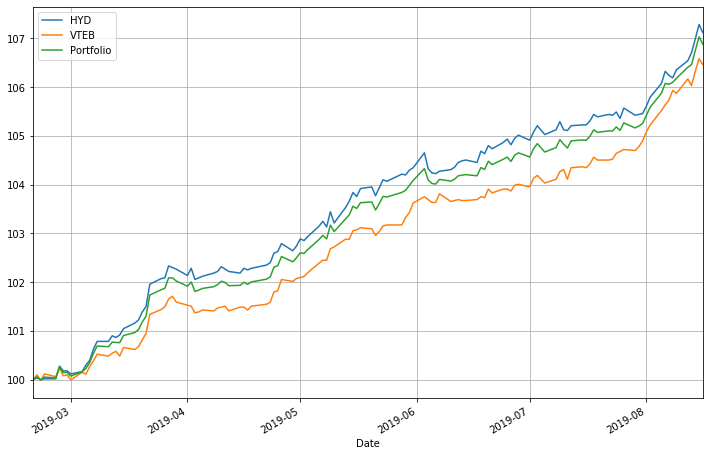

In [3]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio()
quote.setup_mask(['HYD', 'VTEB'])
sd.update(quote.optimize_portfolio())
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio())
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

In [ ]:
quote.setup_mask(['HYD', 'VTEB'])
quote.graph({'HYD': 0.64, 'VTEB': 0.36})